# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np

# **Importing Dataset**

In [ ]:
df =  pd.read_csv('/content/Autism_Screening_Data_Combined.csv')


# **Dataset overview and Preprocessing**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A1,6075.0,0.693169,0.461217,0.0,0.0,1.0,1.0,1.0
A2,6075.0,0.485103,0.499819,0.0,0.0,0.0,1.0,1.0
A3,6075.0,0.537449,0.498637,0.0,0.0,1.0,1.0,1.0
A4,6075.0,0.547490,0.497781,0.0,0.0,1.0,1.0,1.0
A5,6075.0,0.543868,0.498113,0.0,0.0,1.0,1.0,1.0
A6,6075.0,0.443128,0.496796,0.0,0.0,0.0,1.0,1.0
A7,6075.0,0.497942,0.500037,0.0,0.0,0.0,1.0,1.0
A8,6075.0,0.538436,0.498562,0.0,0.0,1.0,1.0,1.0
A9,6075.0,0.429794,0.495087,0.0,0.0,0.0,1.0,1.0
A10,6075.0,0.599835,0.489972,0.0,0.0,1.0,1.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6075 entries, 0 to 6074
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   A1          6075 non-null   int64 
 1   A2          6075 non-null   int64 
 2   A3          6075 non-null   int64 
 3   A4          6075 non-null   int64 
 4   A5          6075 non-null   int64 
 5   A6          6075 non-null   int64 
 6   A7          6075 non-null   int64 
 7   A8          6075 non-null   int64 
 8   A9          6075 non-null   int64 
 9   A10         6075 non-null   int64 
 10  Age         6075 non-null   int64 
 11  Sex         6075 non-null   object
 12  Jauundice   6075 non-null   object
 13  Family_ASD  6075 non-null   object
 14  Class       6075 non-null   object
dtypes: int64(11), object(4)
memory usage: 712.0+ KB


In [ ]:
df.shape

(6075, 15)

In [ ]:
df.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Jauundice,Family_ASD,Class
0,1,1,0,1,0,0,1,1,0,0,15,m,no,no,NO
1,0,1,1,1,0,1,1,0,1,0,15,m,no,no,NO
2,1,1,1,0,1,1,1,1,1,1,15,f,no,yes,YES
3,1,1,1,1,1,1,1,1,0,0,16,f,no,no,YES
4,1,1,1,1,1,1,1,1,1,1,15,f,no,no,YES
5,0,1,1,1,0,1,1,0,1,0,14,m,no,no,NO
6,1,0,0,0,1,0,0,1,0,1,14,f,no,no,NO
7,1,0,0,0,1,0,0,1,0,1,12,m,no,no,NO
8,1,0,0,0,1,0,0,1,0,1,15,f,no,no,NO
9,0,1,1,1,0,1,1,0,1,0,12,f,no,no,NO


In [ ]:
df.isnull().sum()

,0
A1,0
A2,0
A3,0
A4,0
A5,0
A6,0
A7,0
A8,0
A9,0
A10,0


In [ ]:
arr = df['Age'].unique()
print(arr)

[15 16 14 12 13 27 21 18 49 29 31 37 17 38 33 32 30 26 24 25 35 40 36 64
 34 42 43 48 55 50 53 20 28 47 44  4 19 58 45 22 39 23 54 60 41 46 56 61
 59 52 51 62 63 69 76 70 67 71 80 73 57 68 65 66 78 74  5  7 11  9  6 10
  8  2  3  1]


In [ ]:
age_counts = df['Age'].value_counts()
age_counts


,count
Age,
3,547
2,347
4,323
20,236
21,218
...,...
80,1
73,1
78,1


In [ ]:
df['ASQ_scores'] = df.iloc[:, 0:10].eq(1).sum(axis=1)

In [ ]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Jauundice,Family_ASD,Class,ASQ_scores
0,1,1,0,1,0,0,1,1,0,0,15,m,no,no,NO,5
1,0,1,1,1,0,1,1,0,1,0,15,m,no,no,NO,6
2,1,1,1,0,1,1,1,1,1,1,15,f,no,yes,YES,9
3,1,1,1,1,1,1,1,1,0,0,16,f,no,no,YES,8
4,1,1,1,1,1,1,1,1,1,1,15,f,no,no,YES,10


In [ ]:
df.drop(columns=df.columns[0:10], inplace=True)

In [ ]:
df.head()

,Age,Sex,Jauundice,Family_ASD,Class,ASQ_scores
0,15,m,no,no,NO,5
1,15,m,no,no,NO,6
2,15,f,no,yes,YES,9
3,16,f,no,no,YES,8
4,15,f,no,no,YES,10


In [ ]:
df['Sex'].replace({'f':0,'m':1},inplace=True)
#female is 0, and male is 1

<ipython-input-14-ca039203fa69>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].replace({'f':0,'m':1},inplace=True)
<ipython-input-14-ca039203fa69>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'].replace({'f':0,'m':1},inplace=True)


In [ ]:
df['Jauundice'].replace({'yes':1,'no':0},inplace=True)
df['Family_ASD'].replace({'yes':1,'no':0},inplace=True)

<ipython-input-15-8b9cd096af59>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Jauundice'].replace({'yes':1,'no':0},inplace=True)
<ipython-input-15-8b9cd096af59>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Jauundice'].replace({'yes':1,'no':0},inplace=True)
<ipython-input-15-8b9cd096af

In [ ]:
df['Class'].replace({'YES':1,'NO':0},inplace=True)

<ipython-input-16-f05b0238ce0a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Class'].replace({'YES':1,'NO':0},inplace=True)
<ipython-input-16-f05b0238ce0a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Class'].replace({'YES':1,'NO':0},inplace=True)


In [ ]:
df.head(10)

,Age,Sex,Jauundice,Family_ASD,Class,ASQ_scores
0,15,1,0,0,0,5
1,15,1,0,0,0,6
2,15,0,0,1,1,9
3,16,0,0,0,1,8
4,15,0,0,0,1,10
5,14,1,0,0,0,6
6,14,0,0,0,0,4
7,12,1,0,0,0,4
8,15,0,0,0,0,4
9,12,0,0,0,0,6


# **Split the Dataset**

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x=df.drop(columns=['Class'])
y=df['Class']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(4860, 5)

In [ ]:
x_test.shape

(1215, 5)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# **Train the Model**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()


In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 0, ..., 1, 0, 1])

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[792,  56],
       [ 63, 304]])

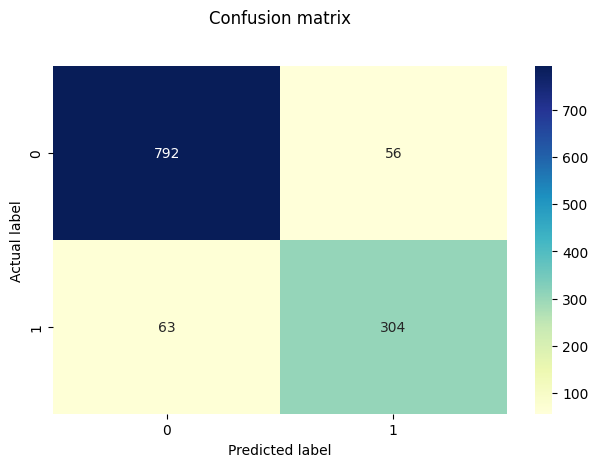

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
class_names = [0, 1]
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='d',cmap="YlGnBu")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix', y=1.1)
plt.tight_layout()
plt.show()


# **Model Evalution**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print(report)

Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       848
           1       0.84      0.83      0.84       367

    accuracy                           0.90      1215
   macro avg       0.89      0.88      0.88      1215
weighted avg       0.90      0.90      0.90      1215



# **SVM ALGORITHM**


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
file_path = "Autism_Screening_Data_Combined.csv"
df = pd.read_csv(file_path)

In [ ]:
label_encoders = {}
for col in ["Sex", "Jauundice", "Family_ASD", "Class"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
X = df.drop(columns=["Class"])
y = df["Class"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
svm_model = SVC(kernel="linear", C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
print(f"Model Accuracy: {accuracy:.2%}")
print("\nClassification Report:\n", report)

Model Accuracy: 90.21%

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       854
           1       0.81      0.87      0.84       361

    accuracy                           0.90      1215
   macro avg       0.88      0.89      0.88      1215
weighted avg       0.90      0.90      0.90      1215

